In [104]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

In [105]:
%ls

 Volume in drive C is Windows8_OS
 Volume Serial Number is 5CA2-A60B

 Directory of C:\Users\raviteja\Desktop\MSBAPM\Pricing Analytics\nikitha files\ALL_DATA\ALL_DATA

05/05/2016  03:10 PM    <DIR>          .
05/05/2016  03:10 PM    <DIR>          ..
05/01/2016  04:36 PM    <DIR>          .ipynb_checkpoints
05/01/2016  02:43 PM            22,473 23_new.xlsx
05/01/2016  02:25 PM            34,937 23_new_o.xlsx
04/21/2016  04:33 PM            56,411 export.xlsx
05/05/2016  02:38 PM           930,700 scatter.html
04/27/2016  07:27 PM            48,574 type_22_All.xlsx
04/27/2016  08:39 PM            41,058 type_23_All.xlsx
04/30/2016  10:46 AM            63,025 type_24_all.xlsx
04/27/2016  08:40 PM            44,441 type_25_All.xlsx
04/27/2016  08:41 PM            67,476 type_26_All.xlsx
04/27/2016  08:42 PM            19,318 type_27_All.xlsx
04/27/2016  08:43 PM            11,982 type_28_All.xlsx
04/27/2016  08:44 PM            12,234 type_29_All.xlsx
04/27/2016  08:46 PM            54,5

In [106]:
type23=pd.read_excel('type_23_All.xlsx')

In [56]:
X=type23.drop(['SITE',u'AVGGASPRICE',u'AVGADDIDEMAND'],axis=1)
#X=type23.drop(['SITE',u'AVGADDIDEMAND'],axis=1)
y=type23.AVGADDIDEMAND
#y=1/type23.AVGADDIDEMAND
X=sm.add_constant(X)
mod=sm.OLS(y,X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          AVGADDIDEMAND   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     627.7
Date:                Thu, 05 May 2016   Prob (F-statistic):          9.64e-163
Time:                        13:11:01   Log-Likelihood:                -43.050
No. Observations:                 777   AIC:                             92.10
Df Residuals:                     774   BIC:                             106.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           1.6926      0.046     36.886      0.000         1.603     1.783
ADDIPRICE23    -0.1491      0.008    -18.119      0.000        -0.165    -0.133
AVGGASTRANS     0.0013   3.96e-05     32.154      0.000         0.001     0.001
==============================================================================
Omnibus:                      351.587   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2535.794
Skew:                           1.900   Prob(JB):                         0.00
Kurtosis:                      10.993   Cond. No.                     2.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:

x1=np.linspace(1,2.8,10)
y1=x1.copy()
#y1=-0.5330283*x1

from bokeh.charts import output_file
from bokeh.plotting import figure, output_notebook, show
p = figure(plot_width=500, plot_height=500)
p.ygrid[0].ticker.desired_num_ticks = 15
p.xgrid[0].ticker.desired_num_ticks = 15
p.scatter(y, sm.OLS(y,X).fit().predict(X), size=4, color="navy", alpha=0.5)
p.line(x1, y1, color="red", alpha=0.5)
p.xaxis.axis_label = "Actual Demand"
p.yaxis.axis_label = "Predicted Demand"
#p.title="ACTUAL vs PREDICTED"
output_file("scatter.html")
show(p)

In [90]:
type23.columns

Index([u'SITE', u'ADDIPRICE23', u'AVGADDIDEMAND', u'AVGGASPRICE',
       u'AVGGASTRANS'],
      dtype='object')

In [91]:
type23.ADDIPRICE23.value_counts()

4.4900    533
6.9900    168
5.4900     25
3.4900     16
7.4900     15
6.4900     14
7.9900      3
5.7400      1
4.8233      1
5.9900      1
Name: ADDIPRICE23, dtype: int64

In [107]:
type23=type23[type23.AVGADDIDEMAND<=3]

In [108]:
type23=type23[(type23['ADDIPRICE23']!=5.7400) & (type23['ADDIPRICE23']!=4.8233) & (type23['ADDIPRICE23']!=5.9900)]

In [109]:
X=type23.drop(['SITE',u'AVGGASPRICE',u'AVGADDIDEMAND'],axis=1)
#X=type23.drop(['SITE',u'AVGADDIDEMAND'],axis=1)
y=np.log(type23.AVGADDIDEMAND)
#y=1/type23.AVGADDIDEMAND

In [110]:
type23.columns

Index([u'SITE', u'ADDIPRICE23', u'AVGADDIDEMAND', u'AVGGASPRICE',
       u'AVGGASTRANS'],
      dtype='object')

In [111]:
#X[u'AVGGASTRANS_2']=X[u'AVGGASTRANS']*X[u'AVGGASTRANS']

In [112]:
#X[u'AVGGASTRANS']=np.log(X[u'AVGGASTRANS_2'])

In [113]:
#X=np.log(X)

In [114]:
X[u'AVGGASTRANS']=np.log(X[u'AVGGASTRANS'])

In [115]:
X=sm.add_constant(X)

In [116]:
mod=sm.OLS(y,X).fit()

In [117]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          AVGADDIDEMAND   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     610.2
Date:                Thu, 05 May 2016   Prob (F-statistic):          8.91e-159
Time:                        15:12:11   Log-Likelihood:                 467.47
No. Observations:                 763   AIC:                            -928.9
Df Residuals:                     760   BIC:                            -915.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const          -1.0345      0.063    -16.434      0.000        -1.158    -0.911
ADDIPRICE23    -0.0861      0.004    -20.291      0.000        -0.094    -0.078
AVGGASTRANS     0.3091      0.010     30.660      0.000         0.289     0.329
==============================================================================
Omnibus:                      187.032   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              742.754
Skew:                           1.093   Prob(JB):                    5.16e-162
Kurtosis:                       7.311   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:

x1=np.linspace(1,2.4,10)
y1=x1.copy()
#y1=-0.5330283*x1

from bokeh.charts import output_file
from bokeh.plotting import figure, output_notebook, show
p = figure(plot_width=500, plot_height=500)
p.ygrid[0].ticker.desired_num_ticks = 15
p.xgrid[0].ticker.desired_num_ticks = 15
p.scatter(np.exp(y), np.exp(sm.OLS(y,X).fit().predict(X)), size=4, color="navy", alpha=0.5)
p.line(x1, y1, color="red", alpha=0.5)
p.xaxis.axis_label = "Actual Demand"
p.yaxis.axis_label = "Predicted Demand"
#p.title="ACTUAL vs PREDICTED"
output_file("scatter.html")
show(p)

In [119]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [120]:
rmse(sm.OLS(y,X).fit().predict(X),y)

0.1311234208977006

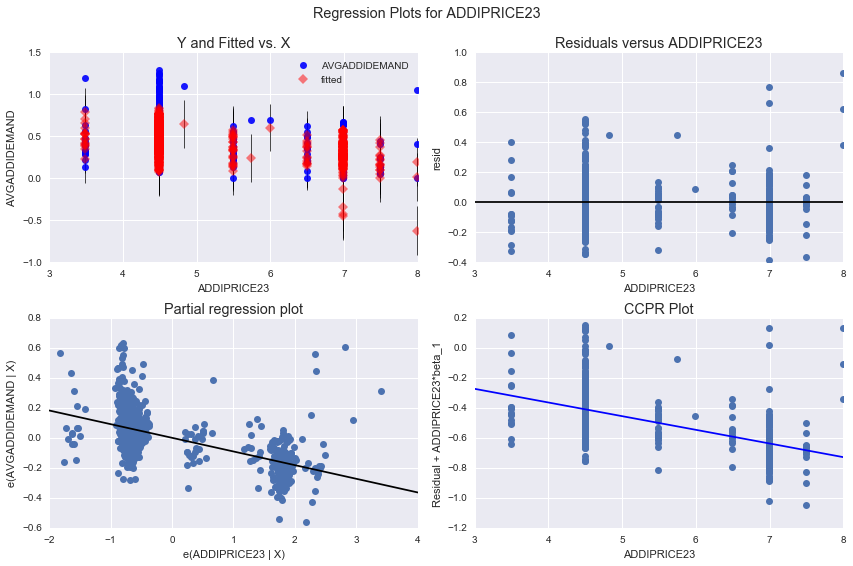

In [16]:
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(mod,"ADDIPRICE23",fig=fig)
plt.show()

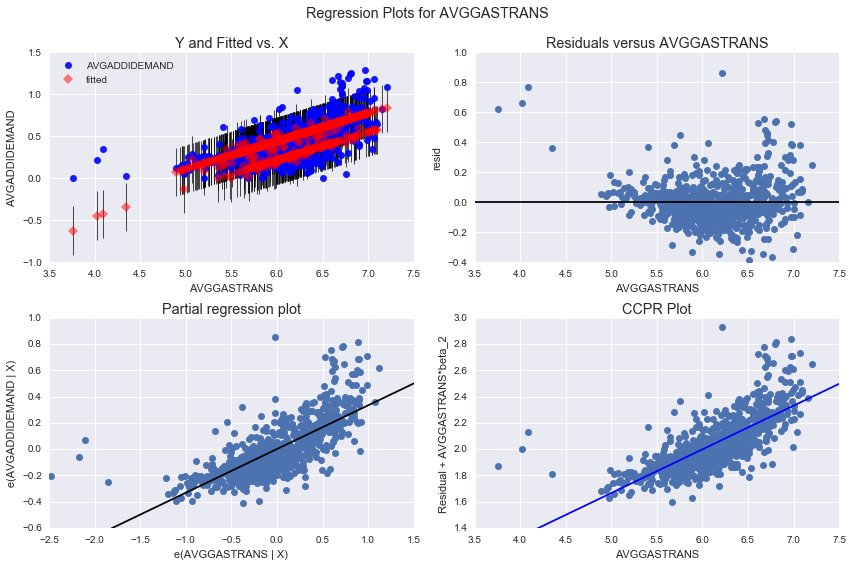

In [17]:
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(mod,"AVGGASTRANS",fig=fig)
plt.show()